In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

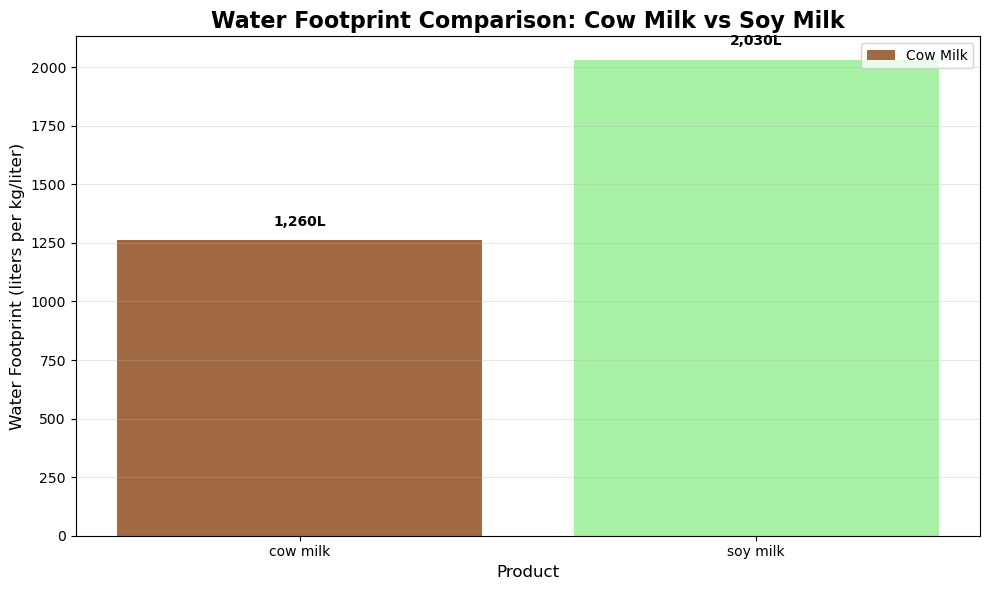

In [3]:
df = pd.read_csv(r'site/final_data/game_data.csv')

# Filter for cow milk and soy milk
milk_data = df[df['AGROVOC_label'].isin(['cow milk', 'soy milk'])].copy()

# Extract the relevant columns
products = milk_data['AGROVOC_label'].tolist()
water_footprint = milk_data['Water Footprint liters (water/kg o liter)'].tolist()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(products, water_footprint, color=['#8B4513', '#90EE90'], alpha=0.8)

# Customize the chart
plt.title('Water Footprint Comparison: Cow Milk vs Soy Milk', fontsize=16, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Water Footprint (liters per kg/liter)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar, value in zip(bars, water_footprint):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{value:,.0f}L', ha='center', va='bottom', fontweight='bold')

# Add colors legend
plt.legend(['Cow Milk', 'Soy Milk'], loc='upper right')

# Improve layout
plt.tight_layout()

# Display the chart
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def compare_products(product1, product2, csv_file= r'site/final_data/game_data.csv'):

    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Filter for the specified products
    product_data = df[df['AGROVOC_label'].isin([product1, product2])].copy()
    
    # Check if both products exist in the dataset
    if len(product_data) != 2:
        available_products = df['AGROVOC_label'].tolist()
        print(f"Error: One or both products not found in dataset.")
        print(f"Available products: {available_products}")
        return
    
    # Extract data
    products = product_data['AGROVOC_label'].tolist()
    water_footprint = product_data['Water Footprint liters (water/kg o liter)'].tolist()
    co2_footprint = product_data['Carbon Footprint (g CO2eq/g o cc)'].tolist()
    
    # Check for missing data
    if any(pd.isna(water_footprint)) or any(pd.isna(co2_footprint)):
        print("Warning: Some data is missing for the selected products.")
        print(f"Water footprint data: {water_footprint}")
        print(f"CO2 footprint data: {co2_footprint}")
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Colors for consistency
    colors = ["#FF9999", "#90EE90"]
    
    # Water Usage Comparison
    bars1 = ax1.bar(products, water_footprint, color=colors, alpha=0.8)
    ax1.set_title(f'Water Footprint Comparison:\n{product1} vs {product2}', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Product', fontsize=12)
    ax1.set_ylabel('Water Footprint (liters per kg/liter)', fontsize=12)
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on water chart
    for bar, value in zip(bars1, water_footprint):
        if not pd.isna(value):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(water_footprint)*0.02, 
                     f'{value:,.0f}L', ha='center', va='bottom', fontweight='bold')
    
    # CO2 Production Comparison
    bars2 = ax2.bar(products, co2_footprint, color=colors, alpha=0.8)
    ax2.set_title(f'Carbon Footprint Comparison:\n{product1} vs {product2}', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Product', fontsize=12)
    ax2.set_ylabel('Carbon Footprint (g CO2eq/g)', fontsize=12)
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels on CO2 chart
    for bar, value in zip(bars2, co2_footprint):
        if not pd.isna(value):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(co2_footprint)*0.02, 
                     f'{value:.3f}g', ha='center', va='bottom', fontweight='bold')
    
    # Improve layout
    plt.tight_layout()
    plt.show()
    

# To see all available products:
def show_available_products(csv_file='game_data.csv'):
    """Display all available products in the dataset."""
    df = pd.read_csv(csv_file)
    products = sorted(df['AGROVOC_label'].tolist())
    print("Available products for comparison:")
    for i, product in enumerate(products, 1):
        print(f"{i:2d}. {product}")

# Uncomment the line below to see all available products:
# show_available_products()

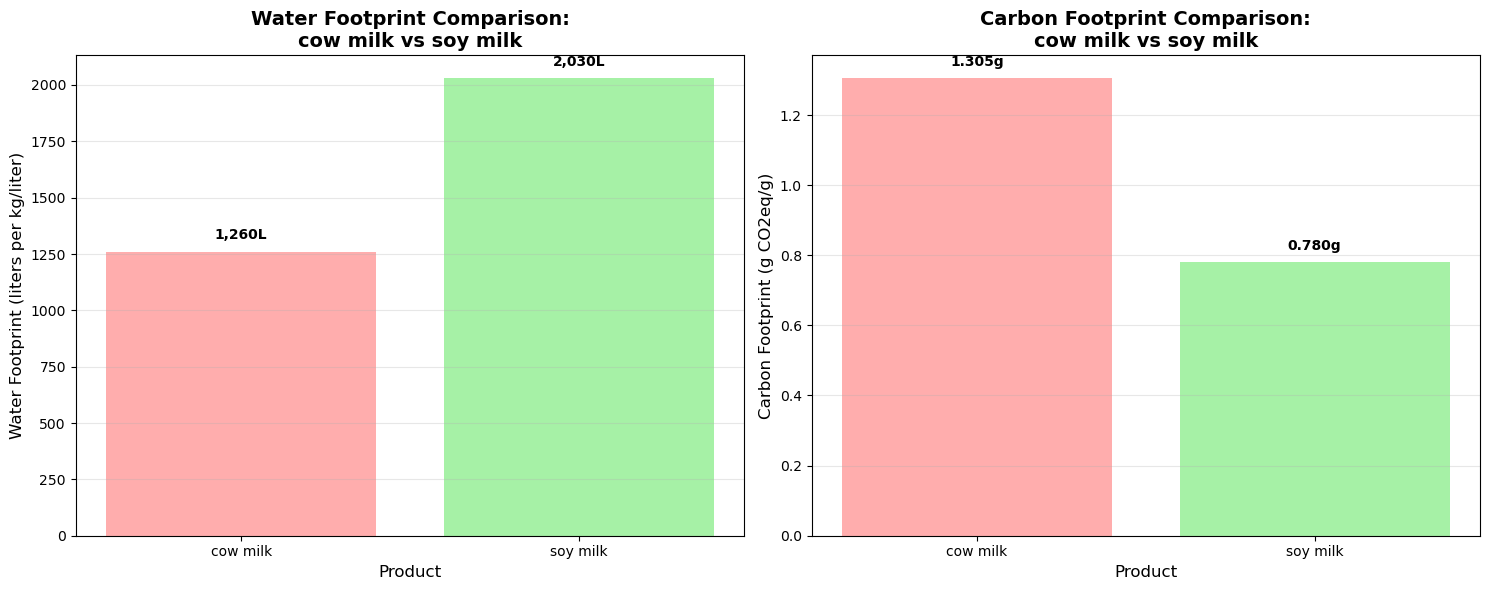

In [29]:
compare_products('cow milk', 'soy milk')

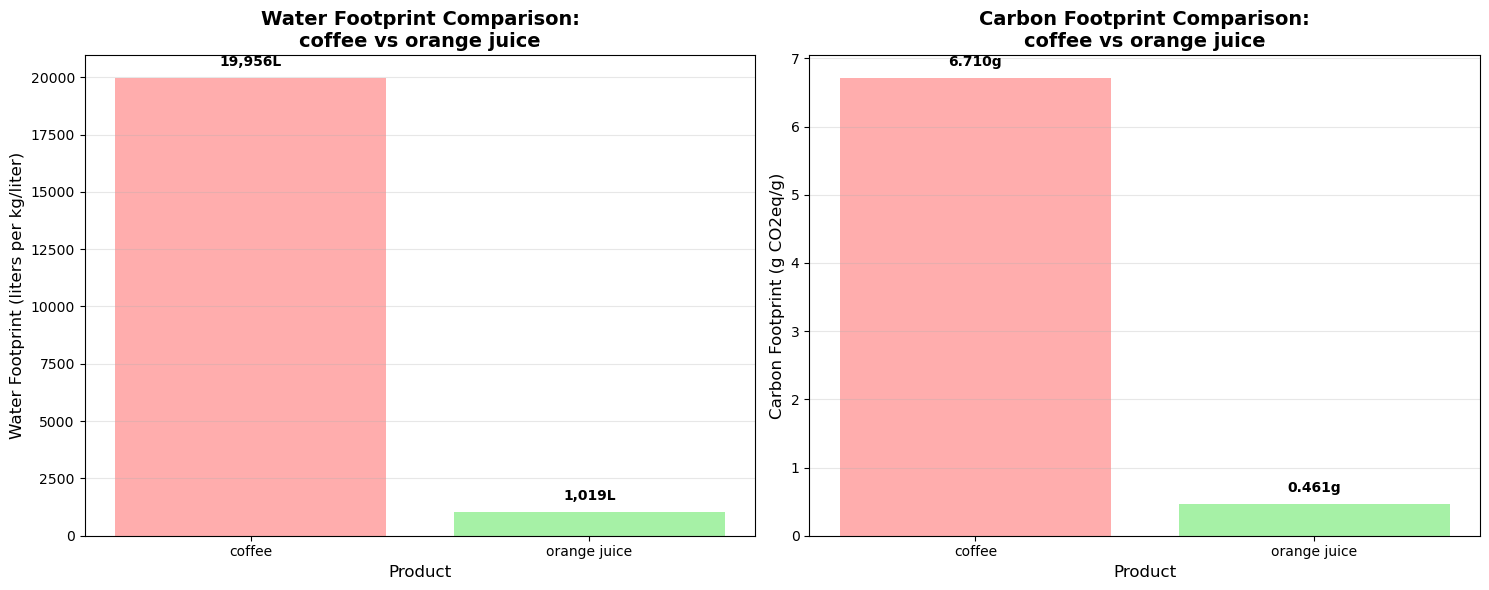

In [30]:
compare_products('coffee', 'orange juice')

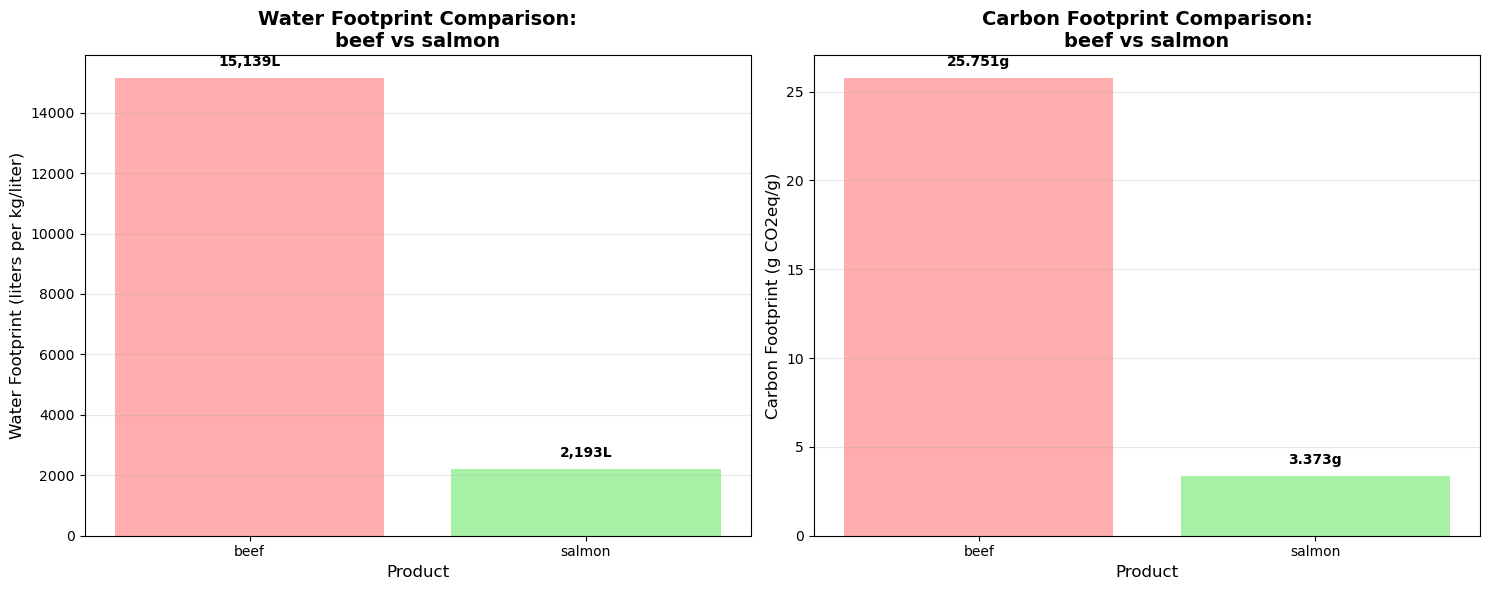

In [32]:
compare_products("beef", "salmon")

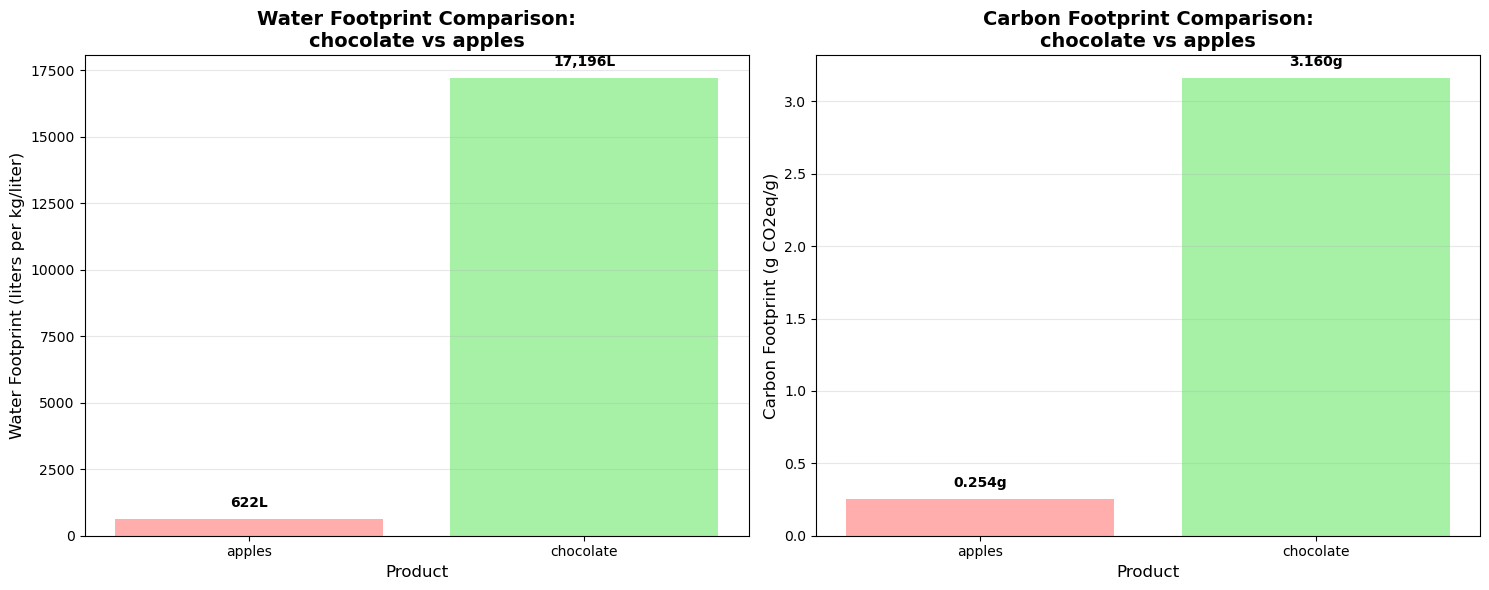

In [33]:
compare_products("chocolate", "apples")

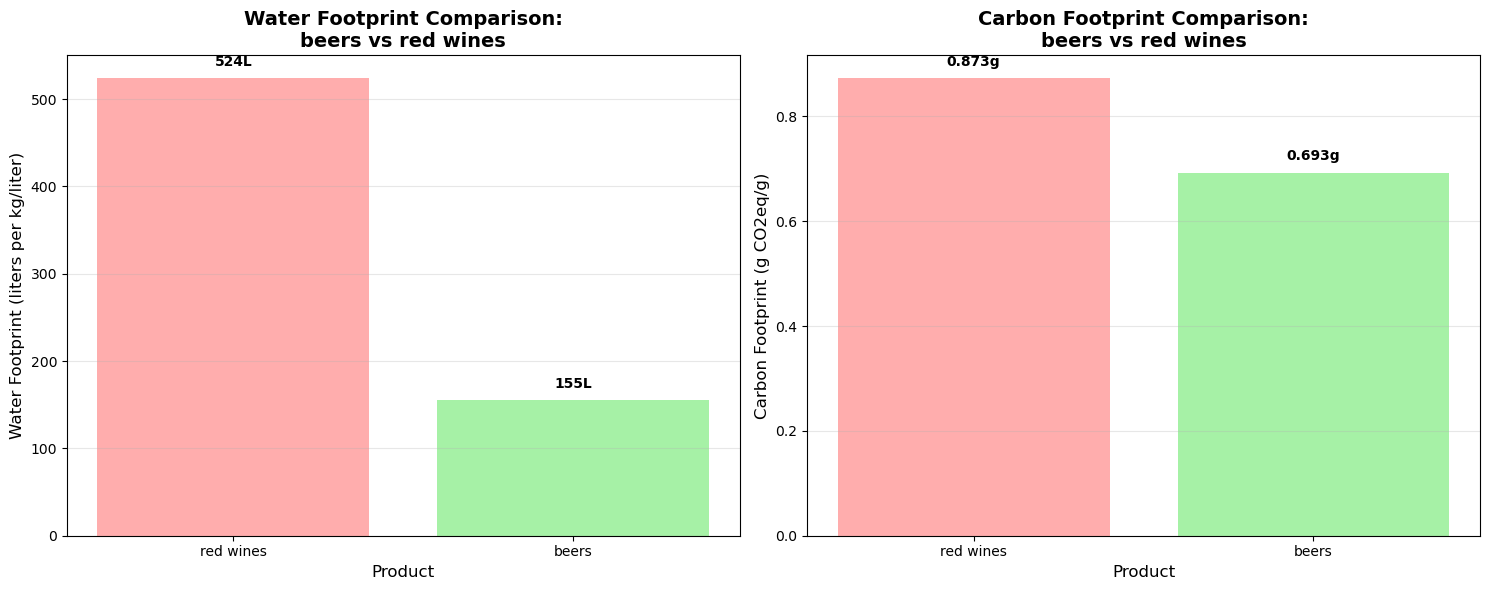

In [34]:
compare_products("beers", "red wines")

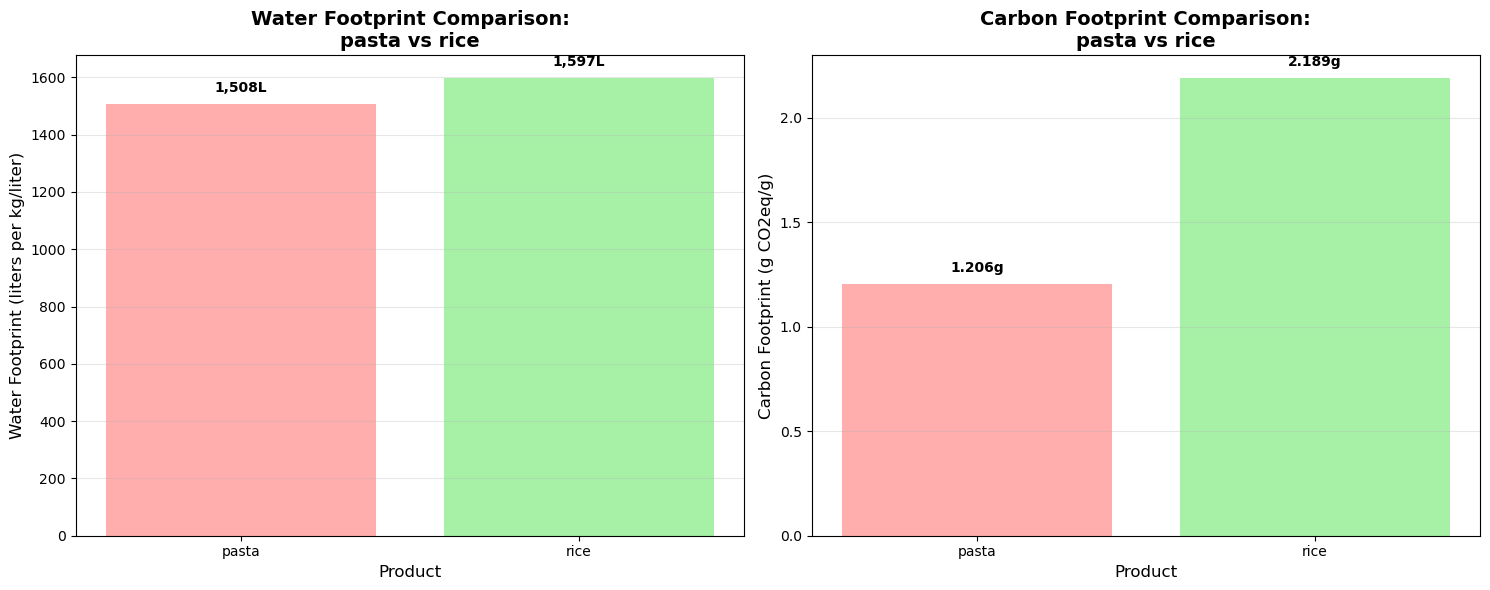

In [35]:
compare_products("pasta", "rice")

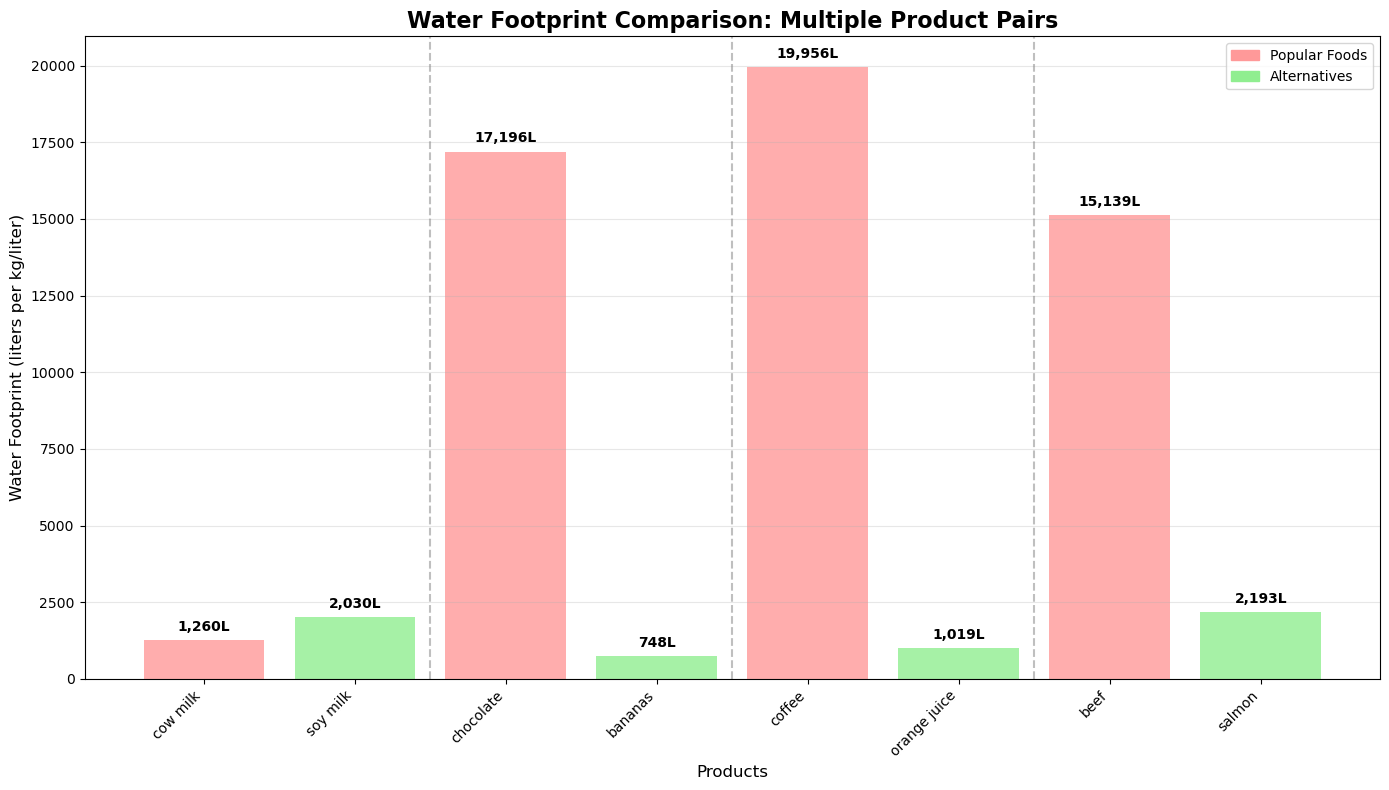

In [26]:
products = ['cow milk', 'soy milk', 'chocolate', 'bananas', 'coffee', 'orange juice', 'beef', 'salmon']

# Filter for the specified products
product_data = df[df['AGROVOC_label'].isin(products)].copy()

# Sort the data to match the order we want
product_data = product_data.set_index('AGROVOC_label').reindex(products).reset_index()

# Extract data
product_names = product_data['AGROVOC_label'].tolist()
water_footprint = product_data['Water Footprint liters (water/kg o liter)'].tolist()

# Create the bar chart
plt.figure(figsize=(14, 8))

# Define colors: light red for traditional foods, light green for alternatives
colors = ['#FF9999', '#90EE90',  # cow milk (red) vs soy milk (green)
          '#FF9999', '#90EE90',  # chocolate (red) vs bananas (green)
          '#FF9999', '#90EE90',  # coffee (red) vs orange juice (green)
          '#FF9999', '#90EE90']  # beef (red) vs salmon (green)</anueml:parameter>


bars = plt.bar(product_names, water_footprint, color=colors, alpha=0.8)

# Customize the chart
plt.title('Water Footprint Comparison: Multiple Product Pairs', fontsize=16, fontweight='bold')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Water Footprint (liters per kg/liter)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar, value in zip(bars, water_footprint):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(water_footprint)*0.01, 
             f'{value:,.0f}L', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add vertical lines to separate comparison pairs
for i in range(1, 4):
    plt.axvline(x=i*2 - 0.5, color='gray', linestyle='--', alpha=0.5)

# Add legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#FF9999', label='Popular Foods')
green_patch = mpatches.Patch(color='#90EE90', label='Alternatives')
plt.legend(handles=[red_patch, green_patch], loc='upper right')

# Improve layout
plt.tight_layout()

# Display the chart
plt.show()

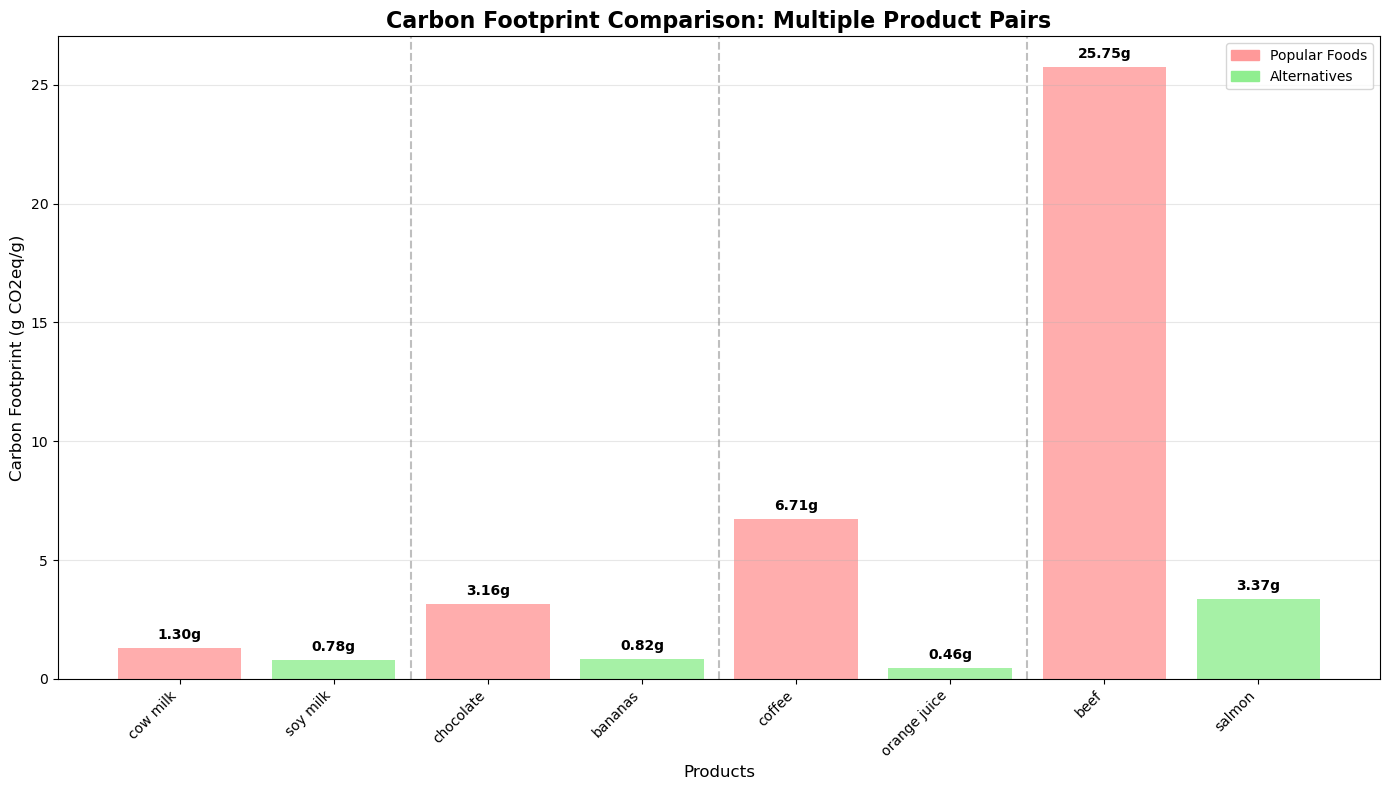

In [27]:
products = ['cow milk', 'soy milk', 'chocolate', 'bananas', 'coffee', 'orange juice', 'beef', 'salmon']

# Filter for the specified products
product_data = df[df['AGROVOC_label'].isin(products)].copy()

# Sort the data to match the order we want
product_data = product_data.set_index('AGROVOC_label').reindex(products).reset_index()

# Extract data
product_names = product_data['AGROVOC_label'].tolist()
co2_footprint = product_data['Carbon Footprint (g CO2eq/g o cc)'].tolist()

# Create the bar chart
plt.figure(figsize=(14, 8))

# Define colors: light red for traditional foods, light green for alternatives
colors = ['#FF9999', '#90EE90',  # cow milk (red) vs soy milk (green)
          '#FF9999', '#90EE90',  # chocolate (red) vs bananas (green)
          '#FF9999', '#90EE90',  # coffee (red) vs orange juice (green)
          '#FF9999', '#90EE90']  # beef (red) vs salmon (green)

bars = plt.bar(product_names, co2_footprint, color=colors, alpha=0.8)

# Customize the chart
plt.title('Carbon Footprint Comparison: Multiple Product Pairs', fontsize=16, fontweight='bold')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Carbon Footprint (g CO2eq/g)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar, value in zip(bars, co2_footprint):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(co2_footprint)*0.01, 
             f'{value:.2f}g', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add vertical lines to separate comparison pairs
for i in range(1, 4):
    plt.axvline(x=i*2 - 0.5, color='gray', linestyle='--', alpha=0.5)

# Add legend
red_patch = mpatches.Patch(color='#FF9999', label='Popular Foods')
green_patch = mpatches.Patch(color='#90EE90', label='Alternatives')
plt.legend(handles=[red_patch, green_patch], loc='upper right')

# Improve layout
plt.tight_layout()

# Display the chart
plt.show()